# Homework 4

Welcome to homework 4!  This week's homework is about visualizations, tables, and functions.  As in homework 3, you'll do the assignment by completing this notebook, filling in the cells provided. When you’re done:

1. Select `Run All` from the `Cell` menu to ensure that you have executed all cells, including the test cells.  Make sure that the visualizations you create are actually displayed.
2. Select `Download as PDF via LaTeX (.pdf)` from the `File` menu
3. Read that file! If any of your lines are too long and get cut off, we won't be able to see them,
   so break them up into multiple lines and download again.
4. Submit that downloaded file (called `hw04.pdf`) to Gradescope.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/weekly](http://data8.org/weekly).

This assignment is due 5pm Thursday, February 18. You will receive an early submission bonus point if you turn it in by 5pm Wednesday, February 17. Directly sharing answers is not okay, but discussing problems with course staff or students is encouraged.

# 0. Preliminaries

As usual, **run the cell below** to prepare the lab and the automatic tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Run this cell, but please don't change it.

# These lines import the numpy and datascience modules.
import numpy as np
from datascience import *

# These lines load the tests.
from client.api.assignment import load_assignment 
hw04 = load_assignment('hw04.ok')

# These lines set up visualizations.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Assignment: HW 04
OK, version v1.5.1



Some of the questions in this homework involve a table loaded from the file `ahs.zip`.  This is a data file from the American Housing Survey (AHS), which collects data about a sample of houses in America, including a survey of a variety of information about the people living in the sampled houses.  Data are collected every 2 years from the same set of houses.  For this assignment we'll use the 2013 dataset.  Each row corresponds to one American house whose owner or occupant was surveyed in 2013.

The AHS dataset is very large, so we've zipped a sample of it to make it easier to download.  **Run the next cell to unzip it.**

In [2]:
# Just run this cell.
!unzip -o bayarea_ahs && echo "Done."

Archive:  bayarea_ahs.zip
  inflating: bayarea_ahs.csv         
Done.


Now you should have another file in your [hw04](./) directory called `bayarea_ahs.csv`. This file is a selected subset of the even larger file called `newhouse.csv` within the publicly-available [AHS dataset from 2013](http://www2.census.gov/programs-surveys/ahs/2013/AHS%202013%20National%20PUF%20v1.2%20CSV.zip).  

First, we'll load the AHS data into a table named `ahs`.  It's a large table, so it may take some time to load.  There's a symbol in the top-right corner of your notebook that indicates what's going on:
* If it's a dark circle, code is running right now.  If your code runs for a long time and you think there's a problem, you can stop it by clicking the Stop button.
* If it's an empty circle, no code is running.
* If it looks like a disconnected circuit, that means your browser can't connect to the lab servers for some reason.  Try clicking Kernel -> Reconnect; or click Save, wait for the top of the screen to say "Last Checkpoint: a few seconds ago," and refresh the page.

In [3]:
# Run this cell, but don't change it.
ahs = Table.read_table("bayarea_ahs.csv")
ahs

CMSA,DIVISION,METRO3,REGION,SMSA,ACCESS,AIR,AIRSYS,BATHS,BEDRMS,BUILT,BURNER,BUSPER,CELLAR,CLIMB,CONDO,COOK,DENS,DINING,DIRAC,DISH,DISPL,DRSHOP,DRY,EBAR,ELEV,EXCLUS,FAMRM,FLOORS,FLOT,FPINS,FPLWK,FRPL,FRPLI,FRSTOC,GARAGE,HALFB,HOTPIP,INCP,KEXCLU,KITCH,KITCHEN,LAUNDY,LIVING,LOT,MOBILTYP,MOPERM,MOSALL,MOSAPR,MOSAUG,MOSDEC,MOSFEB,MOSJAN,MOSJUL,MOSJUN,MOSMAR,MOSMAY,MOSNOV,MOSOCT,MOSSEP,NEWC,NUMAIR,NUNIT2,NUNITS,OARSYS,OTBUP,OTHFN,OTHRUN,OVEN,OWNLOT,PHONE,PLUGS,PORCH,PREOCC,PUBSEW,RECRM,REFR,ROOMS,SEWDIS,SEWDUS,SHARAT,SHARFR,SINHV,SINK,SINVV,SOTHV,SRECV,SRENTV,SSELV,STEAM,TENURE,TIMSHR,TRASH,TUB,TYPE,UNITSF,VACANC2,VACANC2B,VACANCY,WASH,WATER,WATERD,WELDUS,WELL,WHNGET,YRRND,BLDMNT,BLEAK,BSINK,CRACKS,DISAS,EBOARD,EBROKE,ECRUMB,EGOOD,EHOLER,ELEVWK,EMISSR,EMISSW,EROACH,ESAGR,ESLOPW,EVROD,EXPOSE,FREEZE,GRDMNT,HOLES,HOWH,IFBLOW,IFCOLD,IFDRY,IFSEW,IFTLT,ILEAK,LEAK,M12ROACH,M12ROD,MAJR1,MAJR2,MAJR3,MICE,MINR1,MINR2,MINR3,NLEAK1,NLEAK2,NOTSUR,NOWIRE,NUMBLOW,NUMCOLD,NUMDRY,NUMSEW,NUMTLT,OTHCLD,OTLEAK,PILEAK,PLEAK,PLUMB,RATFREQ,RATS,RLEAK,ROACHFRQ,TOILET,TREP,WATERS,WHYCD1,WHYCD2,WHYCD3,WHYCD4,WHYCD5,WLEAK,WTRHRL,ZADEQ,AMTI,AMTT,AMTW,AMTX,BUYI,BUYT,BUYT2,BUYW,BUYW2,CLPEVA,CONFEE,CPRICE,CSTMNT,DOWNPCT,DWNPAY,FLRENT,FMHOTF,FRENT,HELC,HELCN,HELUMN,HELUMP,HUDADMIN,HUDSAMP,IFFEE,INCS,LANPMT,LOOKHS,LOOKNS,LPRICE,LRENT,LVALUE,MCNT,MG,MHOTFE,NUMMOR,POOR,PRENT,PRIN01,PROJ,PVALUE,RAM,RCNTRL,REGMOR,RENT,RNTADJ,TADJ,TXRE,VALUE,VCHRMOV,ZSMHC,APPLY,CUSHOM,DLINE1,ELDER,FRSTHO,HCARE,HDSB,HERRND,HHAGE,HHCITSHP,HHEAR,HHGRAD,HHINUSYR,HHKIDU18,HHLDKID,HHMAR,HHNATVTY,HHPAR,HHPCARE,HHPERRND,HHPHEAR,HHPLINE,HHPMEMRY,HHPSEE,HHPWALK,HHRACE,HHREL,HHSEX,HHSPAN,HHSPOS,HHTEN,HMEMRY,HSEE,HWALK,KIDU18,LANG,MOVEDLY,NONREL,NOSTEP,NROWNR,NRPAYM,PER,PERSINT,RESPTYP,SAMEHH,SAMEHH2,SNITEV,STATUS,ZADULT,ZMVGRP,CROPSL,HHPQALIM,HHPQDIV,HHPQINT,HHPQOTHER,HHPQRENT,HHPQRETIR,HHPQSAL,HHPQSELF,HHPQSS,HHPQSSI,HHPQWELF,HHPQWKCMP,HHPVOTHER,HHSAL,LODG,QALIM,QDIV,QFS1,QINT,QOTHER,QRENT,QRETIR,QSELF,QSS,QSSI,QWELF,QWKCMP,SUBRNT,VCHER,VOTHER,VOTHER2,ZINC,ZINC2,ZINCH,ZINCN
'99','89','1','4','7500','1',2,'1',3,3,1975,'-6',0,3,-6,'3','1',0,1,-6,'1','1','2','1','2','-6',0,0,1,'-6','-6',1,'-9','-9','-6','1',0,'1','-6','-6',1,'1',1,1,44000,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'1',1,'2','2',0,0,'-6','-6','1','1','1','2','2',0,'1',6,'1','1','-6','-6','-6','1','-6','-6','-6','-6','-6','2','1','-6','2','1',1,2700,'-6','-6',-6,'1','1','-6','5','-6',1993,'-6','-6','-6','1','2','-6','2','2','2','1','2','-6','2','2','2','2','2','2','-6','2','-6','2',9,'2','-6','2','2','2','2','2','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-6','-6','-6','-6','-6','1',2550,420,3161,6450,'1','-6','-6','-6','-6',41,-6,-6,2000,'5','1',-6,-6,-6,'2',-6,-6,'2','-6','2','2','2','-6','-6','-6',420000,-6,-6,1,'1',-6,1,2710,-6,2200,'-6',-6,'-6','-6',1,-6,'-6','-6','2',850000,'-6',3699,'-6','-6',1,2,'1','2','2','2',68,'1','2',40,-6,0,0,'1','057',-9,'2','2','2',1,'2','2','2','01',1,'2','2',2,'1','2','2','2',0,'1','2',0,'2','2','2',2,'1','1','1','1','-6','1',2,'0','-6','2','1','2','2','2','2','2','2','1','2','2','2',11000,0,-6,'2','1','-6','1','2','2','2','2','1','2','2','2','-6','-6',36000,36000,377943,377943,'2',1121003
'99','89','1','4','7360','1',2,'2',1,3,1940,'-6',1,4,-6,'3','1',0,1,-6,'1','1','-6','1','2','-6',0,0,2,'-6','-6',2,'-6','-6','-6','1',0,'1','-6','-6',1,'1',0,1,4500,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'1',1,'-6','2',0,0,'-6','-6','1','1','1','-6','1',0,'1',6,'-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','2','2','-6','2','1',1,1968,'-6','-6',-6,'1','1','-6','5','-6',-6,'-6','1','-6','1','2','-6','2','2','-7','-9','2','-6','2','2','2','2','2','2','-6','2','1','2',8,'1','-6','2','2','2','2','2','-6','-6','1','1','1','-6','1','1','1','-6','-6','-6','1','1','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-6

The AHS dataset has one row per housing unit. The columns are described in extensive [documentation](http://www.census.gov/content/dam/Census/programs-surveys/ahs/tech-documentation/AHS%20Codebook%202013.pdf), but we will focus only on a subset of the original columns. The columns in `bayarea_ahs.csv` are described in the `ahs_columns.csv` table.

In [4]:
ahs_columns = Table.read_table('ahs_columns.csv')
ahs_columns

Column,Description,Category
CMSA,1980 design CMSA code,Geography
COUNTY,County code,Geography
DIVISION,Census division,Geography
METRO,Multiple central cities/suburban status within metro areas,Geography
METRO3,Central city / suburban status,Geography
PMSA,1990 design PMSA code,Geography
PSUDOTCT,"Census tract for 1970, 1980 or 1990 containing case",Geography
REGION,Census region,Geography
SMSA,1980 design PMSA code,Geography
STATE,FIPS state code,Geography


# 1. Data Cleaning

Before cleaning up the `ahs` table, we'll clean up a simpler example: the `pop` table defined in the next cell.

In [5]:
# Just run this cell.
# pop.csv is a table of world population estimates from the US Census Bureau.
pop = Table.read_table("pop.csv")
pop

year,population
'1950','2557628654'
'1951','2594939877'
'1952','2636772306'
'1953','2682053389'
'1954','2730228104'
'1955','2782098943'
'1956','2835299673'
'1957','2891349717'
'1958','2948137248'
'1959','3000716593'


In this table, the `year` column is actually made of strings that include, for example, the text `'1981'` (the two single-quote characters are *actually part of the text in the strings*) instead of the number `1981`.  The population column has the same problem.  If you look at [pop.csv](pop.csv), you might see why this happens.

**Question 1.1.** Before we fix it, very briefly **describe why it is a problem to represent quantitative data in this way**.

*Replace this text with your answer.*

**Question 1.2.** In the next cell, define a function called `quoted_number_to_int`.  It should take a single argument, a string that is an integer surrounded by single quotes.  It should return an `int` value representing that integer.  For example, `quoted_number_to_int("'1981'")` should return the number `1981`.

In [6]:
# Define a function called quoted_number_to_int
def quoted_number_to_int(num):
    return int(num.replace("'", "")) #SOLUTION

In [7]:
_ = hw04.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3.** Assign the name `pop_cleaned` to a table that is the same as `pop` *except* that both columns contain integer versions of their data instead of quoted strings.  Use the `apply` method and your `quoted_number_to_int` function.

In [8]:
# Make pop_cleaned from pop.  We've written some of the code for you.
pop_cleaned = Table().with_columns([
        "year", pop.apply(quoted_number_to_int, "year"), 
        "population", pop.apply(quoted_number_to_int, "population") # SOLUTION
        ])
# This line will make the numbers in pop_cleaned a little easier to read.
pop_cleaned.set_format('population', NumberFormatter)

year,population
1950,"2,557,628,654"
1951,"2,594,939,877"
1952,"2,636,772,306"
1953,"2,682,053,389"
1954,"2,730,228,104"
1955,"2,782,098,943"
1956,"2,835,299,673"
1957,"2,891,349,717"
1958,"2,948,137,248"
1959,"3,000,716,593"


In [9]:
_ = hw04.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4.** Now that we have numbers, we can use them to perform useful arithmetic.  Let's look at the distribution of population increases in the late 20th century.  Draw a histogram of the number of people, **in millions**, by which world population **increased** in each year in the dataset (other than the first).  Use bins that have width 10 (million) and cover all population values.

*Hint 1*: Use the function `np.diff`, which is described in [the textbook](http://www.inferentialthinking.com/chapter1/arrays.html) and in more detail in [NumPy's documentation](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.diff.html).  (The examples in NumPy's documentation are often more useful than the descriptions.)

*Hint 2*: To make a histogram of the increases, you'll need to put them into their own table.

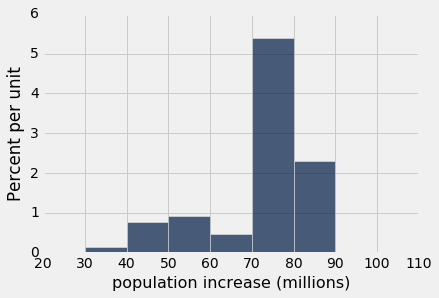

In [10]:
Table().with_column("population increase (millions)", np.diff(pop_cleaned.column("population")) / 1e6).hist("population increase (millions)", bins=np.arange(20, 120, 10)) # SOLUTION

In [11]:
max(np.diff(pop_cleaned.column("population"))/1e6)

87.515823999999995

Returning to the `ahs` table, each household (row) is located in something called a "Standard Metropolitan Statistical Area," or SMSA.  These don't correspond exactly to cities or counties; they generally include a city and some area surrounding it.  For example, all the households near San Jose are part of the San Jose SMSA.  Berkeley is in the Oakland SMSA.

**Question 1.5.** Make a table called `ahs_cleaned` that is a copy of `ahs` but with a version of the `SMSA` column with the string values converted to integers using `quoted_number_to_int`. *Hint*: The `with_column` method will replace an existing column from the input table if the label passed to it already exists.

In [12]:
ahs_cleaned = ahs.with_column("SMSA", ahs.apply(quoted_number_to_int, "SMSA")) # SOLUTION
ahs_cleaned

CMSA,DIVISION,METRO3,REGION,SMSA,ACCESS,AIR,AIRSYS,BATHS,BEDRMS,BUILT,BURNER,BUSPER,CELLAR,CLIMB,CONDO,COOK,DENS,DINING,DIRAC,DISH,DISPL,DRSHOP,DRY,EBAR,ELEV,EXCLUS,FAMRM,FLOORS,FLOT,FPINS,FPLWK,FRPL,FRPLI,FRSTOC,GARAGE,HALFB,HOTPIP,INCP,KEXCLU,KITCH,KITCHEN,LAUNDY,LIVING,LOT,MOBILTYP,MOPERM,MOSALL,MOSAPR,MOSAUG,MOSDEC,MOSFEB,MOSJAN,MOSJUL,MOSJUN,MOSMAR,MOSMAY,MOSNOV,MOSOCT,MOSSEP,NEWC,NUMAIR,NUNIT2,NUNITS,OARSYS,OTBUP,OTHFN,OTHRUN,OVEN,OWNLOT,PHONE,PLUGS,PORCH,PREOCC,PUBSEW,RECRM,REFR,ROOMS,SEWDIS,SEWDUS,SHARAT,SHARFR,SINHV,SINK,SINVV,SOTHV,SRECV,SRENTV,SSELV,STEAM,TENURE,TIMSHR,TRASH,TUB,TYPE,UNITSF,VACANC2,VACANC2B,VACANCY,WASH,WATER,WATERD,WELDUS,WELL,WHNGET,YRRND,BLDMNT,BLEAK,BSINK,CRACKS,DISAS,EBOARD,EBROKE,ECRUMB,EGOOD,EHOLER,ELEVWK,EMISSR,EMISSW,EROACH,ESAGR,ESLOPW,EVROD,EXPOSE,FREEZE,GRDMNT,HOLES,HOWH,IFBLOW,IFCOLD,IFDRY,IFSEW,IFTLT,ILEAK,LEAK,M12ROACH,M12ROD,MAJR1,MAJR2,MAJR3,MICE,MINR1,MINR2,MINR3,NLEAK1,NLEAK2,NOTSUR,NOWIRE,NUMBLOW,NUMCOLD,NUMDRY,NUMSEW,NUMTLT,OTHCLD,OTLEAK,PILEAK,PLEAK,PLUMB,RATFREQ,RATS,RLEAK,ROACHFRQ,TOILET,TREP,WATERS,WHYCD1,WHYCD2,WHYCD3,WHYCD4,WHYCD5,WLEAK,WTRHRL,ZADEQ,AMTI,AMTT,AMTW,AMTX,BUYI,BUYT,BUYT2,BUYW,BUYW2,CLPEVA,CONFEE,CPRICE,CSTMNT,DOWNPCT,DWNPAY,FLRENT,FMHOTF,FRENT,HELC,HELCN,HELUMN,HELUMP,HUDADMIN,HUDSAMP,IFFEE,INCS,LANPMT,LOOKHS,LOOKNS,LPRICE,LRENT,LVALUE,MCNT,MG,MHOTFE,NUMMOR,POOR,PRENT,PRIN01,PROJ,PVALUE,RAM,RCNTRL,REGMOR,RENT,RNTADJ,TADJ,TXRE,VALUE,VCHRMOV,ZSMHC,APPLY,CUSHOM,DLINE1,ELDER,FRSTHO,HCARE,HDSB,HERRND,HHAGE,HHCITSHP,HHEAR,HHGRAD,HHINUSYR,HHKIDU18,HHLDKID,HHMAR,HHNATVTY,HHPAR,HHPCARE,HHPERRND,HHPHEAR,HHPLINE,HHPMEMRY,HHPSEE,HHPWALK,HHRACE,HHREL,HHSEX,HHSPAN,HHSPOS,HHTEN,HMEMRY,HSEE,HWALK,KIDU18,LANG,MOVEDLY,NONREL,NOSTEP,NROWNR,NRPAYM,PER,PERSINT,RESPTYP,SAMEHH,SAMEHH2,SNITEV,STATUS,ZADULT,ZMVGRP,CROPSL,HHPQALIM,HHPQDIV,HHPQINT,HHPQOTHER,HHPQRENT,HHPQRETIR,HHPQSAL,HHPQSELF,HHPQSS,HHPQSSI,HHPQWELF,HHPQWKCMP,HHPVOTHER,HHSAL,LODG,QALIM,QDIV,QFS1,QINT,QOTHER,QRENT,QRETIR,QSELF,QSS,QSSI,QWELF,QWKCMP,SUBRNT,VCHER,VOTHER,VOTHER2,ZINC,ZINC2,ZINCH,ZINCN
'99','89','1','4',7500,'1',2,'1',3,3,1975,'-6',0,3,-6,'3','1',0,1,-6,'1','1','2','1','2','-6',0,0,1,'-6','-6',1,'-9','-9','-6','1',0,'1','-6','-6',1,'1',1,1,44000,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'1',1,'2','2',0,0,'-6','-6','1','1','1','2','2',0,'1',6,'1','1','-6','-6','-6','1','-6','-6','-6','-6','-6','2','1','-6','2','1',1,2700,'-6','-6',-6,'1','1','-6','5','-6',1993,'-6','-6','-6','1','2','-6','2','2','2','1','2','-6','2','2','2','2','2','2','-6','2','-6','2',9,'2','-6','2','2','2','2','2','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-6','-6','-6','-6','-6','1',2550,420,3161,6450,'1','-6','-6','-6','-6',41,-6,-6,2000,'5','1',-6,-6,-6,'2',-6,-6,'2','-6','2','2','2','-6','-6','-6',420000,-6,-6,1,'1',-6,1,2710,-6,2200,'-6',-6,'-6','-6',1,-6,'-6','-6','2',850000,'-6',3699,'-6','-6',1,2,'1','2','2','2',68,'1','2',40,-6,0,0,'1','057',-9,'2','2','2',1,'2','2','2','01',1,'2','2',2,'1','2','2','2',0,'1','2',0,'2','2','2',2,'1','1','1','1','-6','1',2,'0','-6','2','1','2','2','2','2','2','2','1','2','2','2',11000,0,-6,'2','1','-6','1','2','2','2','2','1','2','2','2','-6','-6',36000,36000,377943,377943,'2',1121003
'99','89','1','4',7360,'1',2,'2',1,3,1940,'-6',1,4,-6,'3','1',0,1,-6,'1','1','-6','1','2','-6',0,0,2,'-6','-6',2,'-6','-6','-6','1',0,'1','-6','-6',1,'1',0,1,4500,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'1',1,'-6','2',0,0,'-6','-6','1','1','1','-6','1',0,'1',6,'-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','2','2','-6','2','1',1,1968,'-6','-6',-6,'1','1','-6','5','-6',-6,'-6','1','-6','1','2','-6','2','2','-7','-9','2','-6','2','2','2','2','2','2','-6','2','1','2',8,'1','-6','2','2','2','2','2','-6','-6','1','1','1','-6','1','1','1','-6','-6','-6','1','1','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-6','-

In [13]:
_ = hw04.grade('q15')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.6.** In the next cell, we've loaded a table called [`ba_smsa_names`](ba_smsa_names.csv) that associates SMSA numbers (like 7400) with English names (like "San Jose").  Using that table and the `join` method, assign the name `ahs_named` to a table that extends `ahs_cleaned` and has an additional column called `"SMSA names"` containing the names that correspond to the `SMSA` column.

In [14]:
ba_smsa_names = Table.read_table("ba_smsa_names.csv")
ahs_named = ahs_cleaned.join("SMSA", ba_smsa_names) # SOLUTION
ahs_named


SMSA,CMSA,DIVISION,METRO3,REGION,ACCESS,AIR,AIRSYS,BATHS,BEDRMS,BUILT,BURNER,BUSPER,CELLAR,CLIMB,CONDO,COOK,DENS,DINING,DIRAC,DISH,DISPL,DRSHOP,DRY,EBAR,ELEV,EXCLUS,FAMRM,FLOORS,FLOT,FPINS,FPLWK,FRPL,FRPLI,FRSTOC,GARAGE,HALFB,HOTPIP,INCP,KEXCLU,KITCH,KITCHEN,LAUNDY,LIVING,LOT,MOBILTYP,MOPERM,MOSALL,MOSAPR,MOSAUG,MOSDEC,MOSFEB,MOSJAN,MOSJUL,MOSJUN,MOSMAR,MOSMAY,MOSNOV,MOSOCT,MOSSEP,NEWC,NUMAIR,NUNIT2,NUNITS,OARSYS,OTBUP,OTHFN,OTHRUN,OVEN,OWNLOT,PHONE,PLUGS,PORCH,PREOCC,PUBSEW,RECRM,REFR,ROOMS,SEWDIS,SEWDUS,SHARAT,SHARFR,SINHV,SINK,SINVV,SOTHV,SRECV,SRENTV,SSELV,STEAM,TENURE,TIMSHR,TRASH,TUB,TYPE,UNITSF,VACANC2,VACANC2B,VACANCY,WASH,WATER,WATERD,WELDUS,WELL,WHNGET,YRRND,BLDMNT,BLEAK,BSINK,CRACKS,DISAS,EBOARD,EBROKE,ECRUMB,EGOOD,EHOLER,ELEVWK,EMISSR,EMISSW,EROACH,ESAGR,ESLOPW,EVROD,EXPOSE,FREEZE,GRDMNT,HOLES,HOWH,IFBLOW,IFCOLD,IFDRY,IFSEW,IFTLT,ILEAK,LEAK,M12ROACH,M12ROD,MAJR1,MAJR2,MAJR3,MICE,MINR1,MINR2,MINR3,NLEAK1,NLEAK2,NOTSUR,NOWIRE,NUMBLOW,NUMCOLD,NUMDRY,NUMSEW,NUMTLT,OTHCLD,OTLEAK,PILEAK,PLEAK,PLUMB,RATFREQ,RATS,RLEAK,ROACHFRQ,TOILET,TREP,WATERS,WHYCD1,WHYCD2,WHYCD3,WHYCD4,WHYCD5,WLEAK,WTRHRL,ZADEQ,AMTI,AMTT,AMTW,AMTX,BUYI,BUYT,BUYT2,BUYW,BUYW2,CLPEVA,CONFEE,CPRICE,CSTMNT,DOWNPCT,DWNPAY,FLRENT,FMHOTF,FRENT,HELC,HELCN,HELUMN,HELUMP,HUDADMIN,HUDSAMP,IFFEE,INCS,LANPMT,LOOKHS,LOOKNS,LPRICE,LRENT,LVALUE,MCNT,MG,MHOTFE,NUMMOR,POOR,PRENT,PRIN01,PROJ,PVALUE,RAM,RCNTRL,REGMOR,RENT,RNTADJ,TADJ,TXRE,VALUE,VCHRMOV,ZSMHC,APPLY,CUSHOM,DLINE1,ELDER,FRSTHO,HCARE,HDSB,HERRND,HHAGE,HHCITSHP,HHEAR,HHGRAD,HHINUSYR,HHKIDU18,HHLDKID,HHMAR,HHNATVTY,HHPAR,HHPCARE,HHPERRND,HHPHEAR,HHPLINE,HHPMEMRY,HHPSEE,HHPWALK,HHRACE,HHREL,HHSEX,HHSPAN,HHSPOS,HHTEN,HMEMRY,HSEE,HWALK,KIDU18,LANG,MOVEDLY,NONREL,NOSTEP,NROWNR,NRPAYM,PER,PERSINT,RESPTYP,SAMEHH,SAMEHH2,SNITEV,STATUS,ZADULT,ZMVGRP,CROPSL,HHPQALIM,HHPQDIV,HHPQINT,HHPQOTHER,HHPQRENT,HHPQRETIR,HHPQSAL,HHPQSELF,HHPQSS,HHPQSSI,HHPQWELF,HHPQWKCMP,HHPVOTHER,HHSAL,LODG,QALIM,QDIV,QFS1,QINT,QOTHER,QRENT,QRETIR,QSELF,QSS,QSSI,QWELF,QWKCMP,SUBRNT,VCHER,VOTHER,VOTHER2,ZINC,ZINC2,ZINCH,ZINCN,SMSA name
5775,'99','89','2','4','-6',-6,'-6',-6,-6,-6,'-6',-6,-6,-6,'-6','-6',-6,-6,-6,'-6','-6','-6','-6','-6','-6',-6,-6,-6,'-6','-6',-6,'-6','-6','-6','-6',-6,'-6','-6','-6',-6,'-6',-6,-6,-6,'-6',-6,'-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','2',-6,'-6',-6,'-6','-6',-6,-6,'-6','-6','-6','-6','-6','-6','-6',-6,'-6',-6,'-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6',1,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6',-6,-6,-6,-6,'-6','-6','-6','-6','-6',-6,-6,-6,-6,'-6','-6',-6,-6,-6,'-6',-6,-6,'-6','-6','2','-6','-6','-6','-6','-6',-6,-6,-6,-6,'-6',-6,-6,-6,-6,-6,'-6',-6,'-6','-6',-6,-6,'-6','-6','-6',-6,'-6',-6,'-6','-6',-6,-6,'-6','-6','-6','-6',-6,'-6','-6',-6,-6,-6,-6,'-6','-6',-6,'-6','-6','-6',-6,'-6','-6','-6','-6',-6,'-6','-6',-6,'-6','-6','-6','-6',-6,'-6','-6',-6,'-6','-6','-6',-6,'2','-9','1','-6','-6','4',-6,'-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6',-6,-6,-6,'-9','-9','-6','-9','-9','-9','-9','-9','-9','-9','-9','-9','-6','-6',-6,-6,-6,-6,'-6',-6,Oakland
5775,'99','89','1','4','1',2,'2',1,1,1940,'-6',0,-6,0,'3','1',0,1,-6,'2','2','-6','2','-6','1',0,0,2,'-6','-6',2,'-6','-6','-6','1',0,'1','-6','1',1,'1',0,1,-6,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'3',4,'-6','-6',0,0,'-6','-6','1','1','1','-6','1',0,'1',4,'-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','-6','2','-6','2','1',1,5000,'-6','-6',-6,'2','1','-6','5','-6',-6,'-6','3','-6','1','2','-6','-6','-6','-6','-6','-6','-6','-6','-6','2','-6','-6','1','-6','1','2','2',8,'2','1','2','2','2','2','2','-6','2','2','2','1','-

In [15]:
_ = hw04.grade('q16')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.7.** Create a bar chart to show how many households in `ahs_named` are in each SMSA. Use the SMSA names to label each bar, not the codes.

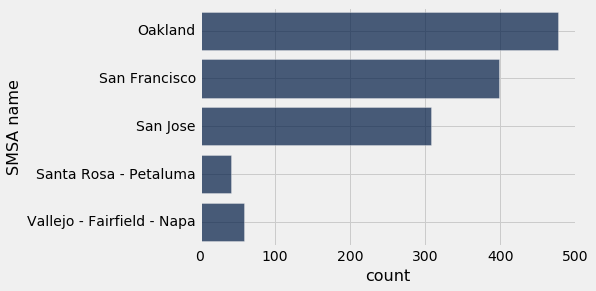

In [16]:
ahs_named.group("SMSA name").barh("SMSA name") # SOLUTION

# 2. Investigating poverty
We're going to investigate the rate of poverty among households in the Bay Area.  According to the [Federal Poverty Guidelines](https://aspe.hhs.gov/2013-poverty-guidelines), a household is in poverty if its combined annual income is below a certain threshold, which depends on the year and the number of people in the household.  The 2013 Federal Poverty Guideline threshold for poverty is an annual income of \$7,470 plus \$4,020 for each person in the household (so \$11,490 for a one-person household, or \$15,510 total for a two-person household).  

For these questions, you will need to find particular columns by reading their descriptions. You can refer to the [documentation pdf](http://www.census.gov/content/dam/Census/programs-surveys/ahs/tech-documentation/AHS%20Codebook%202013.pdf) or search through the `ahs_columns` table (recommended). Narrowing down this table by category can speed up the process a lot!

In [17]:
ahs_columns.group('Category')

Category,count
Geography,11
Household Composition,90
Housing Cost,359
Income,84
Unit,154
Unit Quality,84


**Question 2.1.** Find the column that records *Household income*. Use it to generate a histogram of incomes for households in the Bay Area. The `bins` to use have been provided for you.

According to the documentation of this column, the value -6 is not an income, but instead a special code indicating that the notion of "household income" was not applicable. Do not include these values in your histogram!

*Explanation of `bins`:* The `np.append` function creates a longer array out of two arrays. In this case, we create smaller bins for smaller incomes and large bins for large incomes.

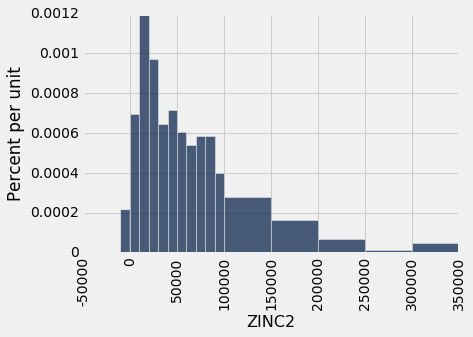

In [18]:
bins=np.append(np.arange(-10000, 100000, 10000), np.arange(100000, 400000, 50000))
ahs_named.where(ahs_named.column("ZINC2") != -6).hist("ZINC2", bins=bins) # SOLUTION

**Question 2.2.** Next, draw a histogram of the number of people in a household. Choose `bins` of width 1 that together include all of the data, but exclude the value -6 (which again stands for "not applicable").

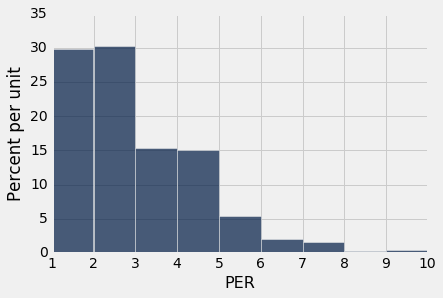

In [19]:
# Make a visualization to show the distribution of the numbers of people per household.
ahs_named.hist("PER", bins=np.arange(1,11,1)) # SOLUTION

**Question 2.3.** Assign `ahs_poverty` to an extension of `ahs_named` that only includes rows with valid household income and people per household values (not -6). The `ahs_poverty` table should also include one additional column called `poverty`. The value of the `poverty` column should be `True` for all rows describing a household that is in poverty according to the 2013 Federal Poverty Guideline described above and `False` otherwise.  

*Hint:* First assign `ahs_valid` to a filtered version of `ahs_named` that does not include the value -6 for either household income or people per household. After that, it is possible to add the `poverty` column in one (long) line of code, but it's better to break the problem down into steps and use variables to store the result of each step.  For example, what are the poverty thresholds for each household?

In [20]:
ahs_valid = ahs_named.where(np.logical_and(ahs_named.column('ZINC2') != -6, ahs_named.column('PER') != -6)) # SOLUTION
ahs_poverty = ahs_valid.with_column("poverty", ahs_valid.column("ZINC2") <= 7470 + ahs_valid.column("PER") * 4020) # SOLUTION
ahs_valid

SMSA,CMSA,DIVISION,METRO3,REGION,ACCESS,AIR,AIRSYS,BATHS,BEDRMS,BUILT,BURNER,BUSPER,CELLAR,CLIMB,CONDO,COOK,DENS,DINING,DIRAC,DISH,DISPL,DRSHOP,DRY,EBAR,ELEV,EXCLUS,FAMRM,FLOORS,FLOT,FPINS,FPLWK,FRPL,FRPLI,FRSTOC,GARAGE,HALFB,HOTPIP,INCP,KEXCLU,KITCH,KITCHEN,LAUNDY,LIVING,LOT,MOBILTYP,MOPERM,MOSALL,MOSAPR,MOSAUG,MOSDEC,MOSFEB,MOSJAN,MOSJUL,MOSJUN,MOSMAR,MOSMAY,MOSNOV,MOSOCT,MOSSEP,NEWC,NUMAIR,NUNIT2,NUNITS,OARSYS,OTBUP,OTHFN,OTHRUN,OVEN,OWNLOT,PHONE,PLUGS,PORCH,PREOCC,PUBSEW,RECRM,REFR,ROOMS,SEWDIS,SEWDUS,SHARAT,SHARFR,SINHV,SINK,SINVV,SOTHV,SRECV,SRENTV,SSELV,STEAM,TENURE,TIMSHR,TRASH,TUB,TYPE,UNITSF,VACANC2,VACANC2B,VACANCY,WASH,WATER,WATERD,WELDUS,WELL,WHNGET,YRRND,BLDMNT,BLEAK,BSINK,CRACKS,DISAS,EBOARD,EBROKE,ECRUMB,EGOOD,EHOLER,ELEVWK,EMISSR,EMISSW,EROACH,ESAGR,ESLOPW,EVROD,EXPOSE,FREEZE,GRDMNT,HOLES,HOWH,IFBLOW,IFCOLD,IFDRY,IFSEW,IFTLT,ILEAK,LEAK,M12ROACH,M12ROD,MAJR1,MAJR2,MAJR3,MICE,MINR1,MINR2,MINR3,NLEAK1,NLEAK2,NOTSUR,NOWIRE,NUMBLOW,NUMCOLD,NUMDRY,NUMSEW,NUMTLT,OTHCLD,OTLEAK,PILEAK,PLEAK,PLUMB,RATFREQ,RATS,RLEAK,ROACHFRQ,TOILET,TREP,WATERS,WHYCD1,WHYCD2,WHYCD3,WHYCD4,WHYCD5,WLEAK,WTRHRL,ZADEQ,AMTI,AMTT,AMTW,AMTX,BUYI,BUYT,BUYT2,BUYW,BUYW2,CLPEVA,CONFEE,CPRICE,CSTMNT,DOWNPCT,DWNPAY,FLRENT,FMHOTF,FRENT,HELC,HELCN,HELUMN,HELUMP,HUDADMIN,HUDSAMP,IFFEE,INCS,LANPMT,LOOKHS,LOOKNS,LPRICE,LRENT,LVALUE,MCNT,MG,MHOTFE,NUMMOR,POOR,PRENT,PRIN01,PROJ,PVALUE,RAM,RCNTRL,REGMOR,RENT,RNTADJ,TADJ,TXRE,VALUE,VCHRMOV,ZSMHC,APPLY,CUSHOM,DLINE1,ELDER,FRSTHO,HCARE,HDSB,HERRND,HHAGE,HHCITSHP,HHEAR,HHGRAD,HHINUSYR,HHKIDU18,HHLDKID,HHMAR,HHNATVTY,HHPAR,HHPCARE,HHPERRND,HHPHEAR,HHPLINE,HHPMEMRY,HHPSEE,HHPWALK,HHRACE,HHREL,HHSEX,HHSPAN,HHSPOS,HHTEN,HMEMRY,HSEE,HWALK,KIDU18,LANG,MOVEDLY,NONREL,NOSTEP,NROWNR,NRPAYM,PER,PERSINT,RESPTYP,SAMEHH,SAMEHH2,SNITEV,STATUS,ZADULT,ZMVGRP,CROPSL,HHPQALIM,HHPQDIV,HHPQINT,HHPQOTHER,HHPQRENT,HHPQRETIR,HHPQSAL,HHPQSELF,HHPQSS,HHPQSSI,HHPQWELF,HHPQWKCMP,HHPVOTHER,HHSAL,LODG,QALIM,QDIV,QFS1,QINT,QOTHER,QRENT,QRETIR,QSELF,QSS,QSSI,QWELF,QWKCMP,SUBRNT,VCHER,VOTHER,VOTHER2,ZINC,ZINC2,ZINCH,ZINCN,SMSA name
5775,'99','89','1','4','1',2,'2',1,1,1940,'-6',0,-6,0,'3','1',0,1,-6,'2','2','-6','2','-6','1',0,0,2,'-6','-6',2,'-6','-6','-6','1',0,'1','-6','1',1,'1',0,1,-6,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'3',4,'-6','-6',0,0,'-6','-6','1','1','1','-6','1',0,'1',4,'-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','-6','2','-6','2','1',1,5000,'-6','-6',-6,'2','1','-6','5','-6',-6,'-6','3','-6','1','2','-6','-6','-6','-6','-6','-6','-6','-6','-6','2','-6','-6','1','-6','1','2','2',8,'2','1','2','2','2','2','2','-6','2','2','2','1','-6','2','2','1','-6','-6','-6','1','-6','1','-6','-6','-6','2','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-6','-6','-6','-6','-6','2',-6,-6,-6,-6,'2','2','-6','2','-6',-6,-6,-6,-6,'-6','-6',-6,-6,12,'-6',-6,-6,'-6','3','2','-6','-6','-6','-6','-6',-6,-6,-6,-6,'-6',-6,-6,442,-6,-6,'-6',-6,'-6','2',-6,757,'2','-6','-6',-6,'-6',811,'-6','-6',1,0,'-6','2','2','2',60,'1','2',44,-6,0,0,'6','057',-6,'2','2','2',1,'2','2','2','01',2,'2','2',-6,'1','2','2','2',0,'1','2',0,'2','-6','-6',1,'1','6','1','1','-6','1',1,'0','-6','2','2','2','2','2','2','1','2','2','2','2','2',-13,53000,-6,'2','2','-6','2','2','2','2','2','2','2','2','2','2','-6',-13,-13,52987,52987,'2',43000,Oakland
5775,'99','89','2','4','1',2,'1',2,3,1970,'-6',1,3,-6,'3','1',0,1,-6,'1','1','2','1','2','-6',0,0,1,'-6','1',1,'-9','1','-6','1',0,'1','-6','-6',1,'1',0,1,58520,'-6',-6,'2','2','2','2','2','2','2','2','2','2','2','2','2','2',-6,'1',1,'2','2',0,0,'-6','-6','1','1','1','2','1',1,'1',7,'-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','2','1','-6','1','1',1,1825,'-6','-6',-6,'1','1','-6','5','-6',1986,'-6','-6','-6','1','2','-6','2','2','2','1','2','-6','2','2','2','2','2','2','-6','2','-6','2',10,'2','-6','2','2','2','2','2','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','-6','-6','-6','-6','-6','1','-6','-6','-6','-6','1','-6','1','-6','-6','-

In [21]:
_ = hw04.grade("q23")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.4.** Assign `poverty_counts` to a table that has one row per `SMSA` and three columns, where
- The first column labeled "`SMSA name`" has the name of the SMSA
- The second column labeled "`False`" has the count of the number of households *not* in poverty in that SMSA
- The third column labeled "`True`" has the count of the number of households in poverty in that SMSA

Your counts should not include any households that have "not applicable" (-6) values for household income or people per household.

*Hint*: Use `pivot` for the `ahs_poverty` table.

In [22]:
poverty_counts = ahs_poverty.pivot('poverty', 'SMSA name') # SOLUTION
poverty_counts

SMSA name,False,True
Oakland,316,71
San Francisco,253,52
San Jose,216,32
Santa Rosa - Petaluma,31,2
Vallejo - Fairfield - Napa,34,7


In [23]:
_ = hw04.grade("q25")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.5** Draw a bar chart with one bar for each SMSA, labeled by its name, where the length of each bar is the proportion of sampled households in poverty in that SMSA. *Hint*: First create a column of `poverty_proportions` and then add it as a column to `poverty_counts`.

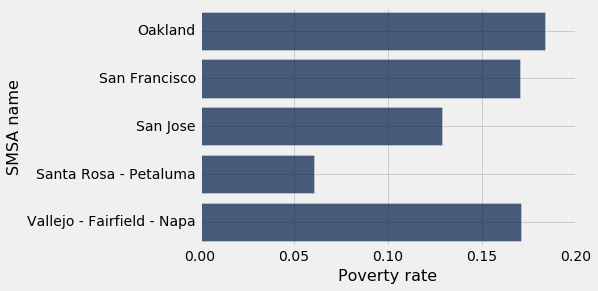

In [29]:
poverty_proportions = poverty_counts.column(2)/(poverty_counts.column(1)+poverty_counts.column(2)) # SOLUTION
poverty_counts.with_column('Poverty rate', poverty_proportions).barh('SMSA name', 'Poverty rate') # SOLUTION

Keep in mind that we have estimated the rate of *household poverty*, not the proportion of *people* who are in poverty.  We have also removed households without income data, which may bias the results further. Using a related dataset called the American Community Survey that is more suited to examining individual people, some economists have [estimated](https://www.jointventure.org/images/stories/pdf/poverty-brief-2015-03.pdf) that the rate of individual poverty in the Bay Area was 11.3% in 2013.

**Question 2.6.** Suppose that the AHS is a simple random sample of households.  (In fact, it’s a complicated kind of random sample, made more complicated by the subsamping we did before we gave you the data, but ignore those details for now.)  Does your visualization above give evidence that poverty is related to location (that is, to the SMSA where a household is located) within the Bay Area?  Write your answer in text in the cell below.

*Write your answer here, replacing this text.*

**Question 2.7.** Does it give evidence that being in certain locations *causes* some households to be in poverty (or not to be in poverty)? Why or why not?

*Write your answer here, replacing this text.*

# 3. Histograms
Suppose we study 100 Berkeley students, recording in a table called `exercise.csv` the average number of hours per week they spend exercising.  The largest observation is 18 hours.  The only observations between 10 and 13 are 10.1, 10.2, 11.5, and 11.5 hours.  We decide to draw a histogram of the data *on the density scale*.  We use larger bins for the larger values.  

In [25]:
# Run this cell to see the bins.
exercise_bins = np.append(np.arange(0, 11+1, 1), np.arange(13, 21, 2))
exercise_bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 17, 19])

This is our code for generating the histogram:
    
    exercise = Table.read_table("exercise.csv")
    # The name of the column with average exercise per week:
    exercise_label = "average exercise (hours per week)"
    # Draw the histogram:
    hours.hist(exercise_label, bins=exercise_bins)

For each quantity below, calculate it by hand, or if it’s impossible to calculate with only this information, say why.  You can write your answer as an expression (such as 2+2) or a number (such as 4). *Note*: There is no `exercise.csv` file distributed with this assignment.

**Question 3.1.** The area of the 10-11 bin

*Write your answer here, replacing this text.*

**Question 3.2.** The area of the 11-13 bin

*Write your answer here, replacing this text.*

**Question 3.3.** The height of the 10-11 bin

*Write your answer here, replacing this text.*

**Question 3.4.** The height of the 11-13 bin

*Write your answer here, replacing this text.*

In [26]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [hw04.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------